<font size="1">  
<h1>Subject: Home Work 3<h1>
    <p>Shahrood University of Technology (SUT)<p>
    <p> Artificial Intelligence</p>
    <p> Student Number: 40103834 </p>
    <p style="color:yellow;">Author: Ehsan Paydar</p> 
    </font>  

<h1 style="color:#a21441;">Import Library</h1>


In [231]:
import sklearn
import numpy as np 
import pandas as pd 
import csv 
from re import X

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

<h1 style="color:#a21441;">Phase one - Part 1 / Load Dataset</h1>

In [203]:
dataset = pd.read_csv('Advertising.csv')
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<h1 style="color:#a21441;">Phase one - Part 2 / Delete the first column</h1>


In [204]:
dataset.drop(dataset.columns[[0]],axis = 1, inplace=True)

dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<h1 style="color:#a21441;">Phase one - Part  3 / Split Data Into Features And Target</h1>

In [205]:
features = dataset[['TV', 'Radio', 'Newspaper']]
target = dataset['Sales']


<h1 style="color:#a21441;">Phase one - Part  4 / Split Training And Test Data</h1>

In [206]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

<h1 style="color:#a21441;">Phase one - Part  5 / Data Normalization Feature Engineering Methods</h1>

In [207]:
# create scaler object
scaler = MinMaxScaler()


# fit the scaler to the training data
scaler.fit(X_train)

# transform the training and test data using the scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


<h1 style="color:yellow;">Phase Two - Part  1 / Build And Train The Model (Linear Regeression)</h1>

In [208]:
# create linear regression model object
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

<h1 style="color:yellow;">Phase Two - Part  2 / Model evaluation using MSE and R2</h1>

In [209]:

# predict the test data
y_pred = model.predict(X_test)

# calculate the mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)

# calculate the r2 score
r2 = metrics.r2_score(y_test, y_pred)

# print the results
print('MSE:', mse)
print('R2:', r2)

MSE: 3.1740973539761064
R2: 0.8994380241009119


<h1 style="color:yellow;">Phase Two - Part 4 / Convergence trend diagram</h1>

/Users/epsoft/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


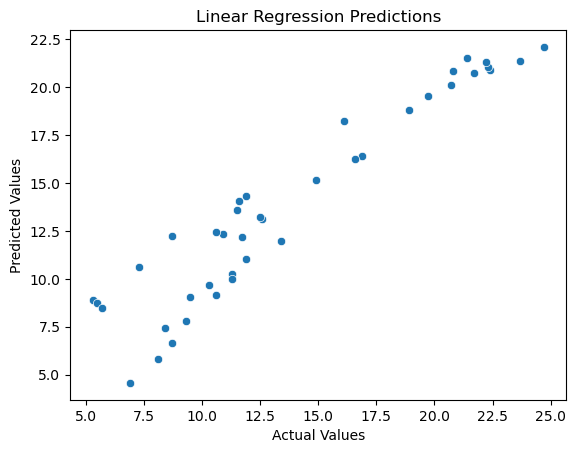

In [210]:
# create a scatter plot of the predicted values against the target values
sns.scatterplot(y_test, y_pred)


# add labels and titles
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')

# show the plot
plt.show()

<h1 style="color:yellow;">Phase Two - Part 5 / The amount of prediction error according to the formula : Error = Ypred - Ytest </h1>

In [211]:
# create a dataframe of actual, predicted and error values
error = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': y_test - y_pred})

# print the dataframe
print(error)

     Actual  Predicted     Error
95     16.9  16.408024  0.491976
15     22.4  20.889882  1.510118
30     21.4  21.553843 -0.153843
158     7.3  10.608503 -3.308503
128    24.7  22.112373  2.587627
115    12.6  13.105592 -0.505592
69     22.3  21.057192  1.242808
170     8.4   7.461010  0.938990
174    11.5  13.606346 -2.106346
45     14.9  15.155070 -0.255070
66      9.5   9.048320  0.451680
182     8.7   6.653283  2.046717
165    11.9  14.345545 -2.445545
78      5.3   8.903493 -3.603493
186    10.3   9.689590  0.610410
177    11.7  12.164944 -0.464944
56      5.5   8.736284 -3.236284
152    16.6  16.265073  0.334927
82     11.3  10.277596  1.022404
68     18.9  18.831091  0.068909
124    19.7  19.560367  0.139633
16     12.5  13.251035 -0.751035
148    10.9  12.336207 -1.436207
93     22.2  21.306951  0.893049
65      9.3   7.827403  1.472597
60      8.1   5.809574  2.290426
84     21.7  20.757532  0.942468
67     13.4  11.981381  1.418619
125    10.6   9.183496  1.416504
132     5.

<h1 style="color:yellow;">Phase Two - Part 6 (+) /Drawing the graph of the data and fitting the prediction line of the model to them</h1>

/Users/epsoft/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


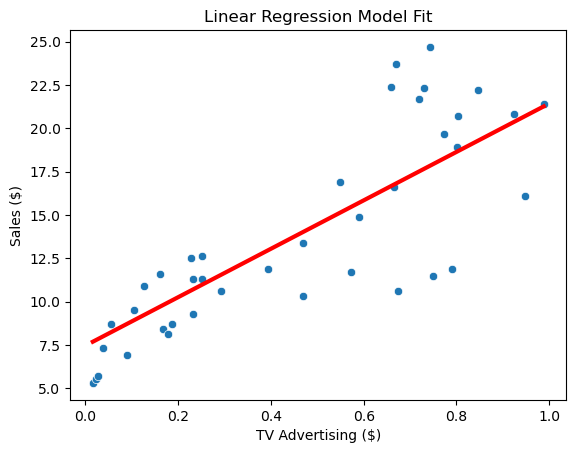

In [212]:

# create a scatterplot of the data points
sns.scatterplot(X_test[:,0], y_test) 

# get the linearly fitted line
line_coeffs = np.polyfit(X_test[:,0], y_pred, 1) 
line = np.poly1d(line_coeffs) 

# add the line to the plot
x_line = np.linspace(min(X_test[:,0]), max(X_test[:,0]), 100) 
plt.plot(x_line, line(x_line), color='red', linewidth=3) 

# add labels and titles
plt.xlabel('TV Advertising ($)') 
plt.ylabel('Sales ($)') 
plt.title('Linear Regression Model Fit') 

# show the plot
plt.show()

<h1 style="color:green;">Phase Three - Part 1 / Again, we use the initial data of the dataset</h1>

In [213]:
dataset = pd.read_csv('Advertising.csv')
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<h1 style="color:green;">Phase Three - Part 2-1 / The correlation matrix</h1>

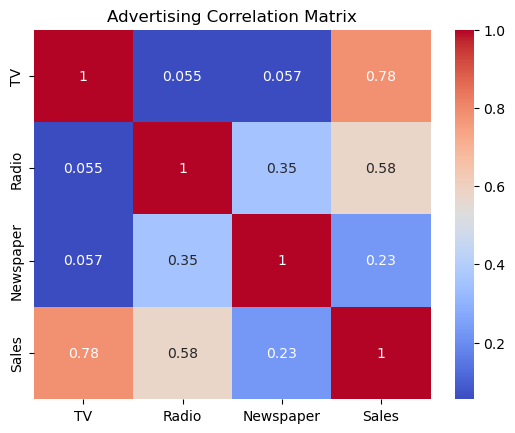

In [214]:
dataset.drop(dataset.columns[[0]],axis = 1, inplace=True)

# create correlation matrix
corr_matrix = dataset.corr()

# visualize the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# add labels and titles
plt.title('Advertising Correlation Matrix')
plt.show()



<h1 style="color:green;">Phase Three - Part 2-2 / Create polynomial features</h1>

In [223]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)

# Create and train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

<h1 style="color:green;">Phase Three - Part 3 / Correlation matrix analysis produces features based on other features (combine and interactions techniques) or delete features that do not have a significant effect.</h1>

In [217]:
# Drop the features with low correlation to the target 
data = dataset.drop(["Newspaper"], axis=1) 
X = data[["TV", "Radio"]]
y = data["Sales"]

<h1 style="color:green;">Phase Three - Part 4 / Split data into train and test set</h1>

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h1 style="color:green;">Phase Three - Part 5 / Normalization technique on the data</h1>

In [221]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h1 style="color:green;">Phase Three - Part 6 / Train the model based on new data</h1>

In [224]:
# Preprocess the new data
X_test_poly = poly_features.transform(X_test)

# Train the model on the new data
model.fit(X_test_poly, y_test)

LinearRegression()

<h1 style="color:green;">Phase Three - Part 7 / Train the model based on new data</h1>

In [194]:
# Use the model to predict on the test set
y_pred = model.predict(X_test_poly)

# Calculate the error
error = y_test - y_pred

# Create a dataframe to visualize the errors
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': error})
print(df)

     Actual  Predicted      Error
88     12.9  17.254436  -4.354436
68     18.9  22.719332  -3.819332
91      7.3  20.427994 -13.127994
99     17.2   7.542709   9.657291
9      10.6  24.371030 -13.771030
126     6.6  12.559272  -5.959272
190    10.8  22.807850 -12.007850
45     14.9   8.343714   6.556286
104    20.7  12.058602   8.641398
30     21.4  15.690246   5.709754
199    13.4   7.891664   5.508336
95     16.9   8.270827   8.629173
132     5.7  11.860560  -6.160560
51     10.7   6.165911   4.534089
156    15.3  10.576644   4.723356
180    10.5  12.362895  -1.862895
6      11.8   6.743910   5.056090
46     10.6  16.650821  -6.050821
37     14.7  10.686617   4.013383
16     12.5  19.038882  -6.538882
177    11.7  20.152239  -8.452239
178    11.8  13.113781  -1.313781
120    15.5   9.562739   5.937261
137    20.8  22.106752  -1.306752
135    11.6   8.967252   2.632748
119     6.6   7.779444  -1.179444
61     24.2  22.407452   1.792548
108     5.3  12.720660  -7.420660
20     18.0  1

<h1 style="color:green;">Phase Three - Part 8(+) / Drawing the graph of the data and fitting the prediction line of the model to them.</h1>

In [ ]:
# Plot the data and fit line
plt.scatter(X_test, y_test, color='red')
predicted_line = poly_features.fit_transform(X_test)
plt.plot(X_test, model.predict(predicted_line), color='blue')
plt.xlabel('Input Features')
plt.ylabel('Target')
plt.title('Polynomial Model Fit')
plt.show()

<h1 style="color:orange;">Phase Four - Part 1/ Load Dataset </h1>

In [227]:
dataset = pd.read_csv('Advertising.csv')

dataset.drop(dataset.columns[[0]],axis = 1, inplace=True)

dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<h1 style="color:orange;">Phase Four - Part 2 / Split the data again into training and test data. </h1>

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<h1 style="color:orange;">Phase Four - Part 3/ Linear Regeression with SGDRegressor </h1>

In [232]:
clf = SGDRegressor(max_iter=100, verbose=10, learning_rate='adaptive')

# Create parameter grid
tuned_parameters = {'penalty':['l1','l2','elasticnet'],
                    'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Fit the model using GridSearchCV
estimator = GridSearchCV(clf, param_grid=tuned_parameters, cv=5)
estimator.fit(X_train, y_train)

-- Epoch 1
Norm: 235157292833.16, NNZs: 2, Bias: 30645028560.386078, T: 128, Avg. loss: 22630602602928801678815657984.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1502797966345.07, NNZs: 2, Bias: 90645028560.386078, T: 256, Avg. loss: 23652526788711555282566643712.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1889447220316.67, NNZs: 2, Bias: 50645028560.386078, T: 384, Avg. loss: 24100661986994215371252170752.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2073235132376.31, NNZs: 2, Bias: 93465239964.038025, T: 512, Avg. loss: 25355904029751506795795316736.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2498594416725.36, NNZs: 2, Bias: 33465239964.038025, T: 640, Avg. loss: 22557110103052152511213338624.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2557456389947.46, NNZs: 2, Bias: -26534760035.961975, T: 768, Avg. loss: 23125743901521541152687259648.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1092661890745.66,

GridSearchCV(cv=5,
             estimator=SGDRegressor(learning_rate='adaptive', max_iter=100,
                                    verbose=10),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']})

<h1 style="color:orange;">Phase Four - Part 4/ Fit - Predict - Evaluate the model  </h1>

In [233]:
# Fit the model
estimator.fit(X_train, y_train)

# Predict on the test set
y_pred = estimator.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

-- Epoch 1
Norm: 1832990964995.72, NNZs: 2, Bias: 72364387281.817902, T: 128, Avg. loss: 21441994017190494160897966080.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1659475634281.16, NNZs: 2, Bias: 32364387281.817902, T: 256, Avg. loss: 23235082399700262468037115904.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 250187442481.99, NNZs: 2, Bias: 152364387281.817902, T: 384, Avg. loss: 23035700605373317641737863168.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2998947578412.50, NNZs: 2, Bias: 52364387281.817902, T: 512, Avg. loss: 24685951558349900667259191296.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1141753033265.05, NNZs: 2, Bias: -67635612718.182098, T: 640, Avg. loss: 23709902803363779691839225856.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 439148660159.42, NNZs: 2, Bias: -72288771165.928223, T: 768, Avg. loss: 24735825220653148367080128512.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 169357175058.66,

/Users/epsoft/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



Norm: 2018390529715.24, NNZs: 2, Bias: 36071507803.255814, T: 128, Avg. loss: 19454348551668811376806068224.000000
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 878677274912.91, NNZs: 2, Bias: 2554038961.882656, T: 256, Avg. loss: 22710010111748180379221098496.000000
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1055585191328.91, NNZs: 2, Bias: -4786310302.795456, T: 384, Avg. loss: 21752491506211831210924048384.000000
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1456422258998.38, NNZs: 2, Bias: -643019863.182304, T: 512, Avg. loss: 20175683676262941049697075200.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 861696309941.62, NNZs: 2, Bias: -2083373874.145256, T: 640, Avg. loss: 18488843835371544966527451136.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1159222371946.04, NNZs: 2, Bias: 21624940235.321419, T: 768, Avg. loss: 18689721222071936743148355584.000000
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 290458979265.80, NNZs: 2, Bias:

<h1 style="color:orange;">Phase Four - Part 5/ The amount of prediction error according to the formula : Error = Ypred - Ytest </h1>

In [234]:
df = pd.DataFrame({"Predicted":y_pred, "Actual":y_test})

# Calculate the error
df['error'] = df['Predicted'] - df['Actual']

# Show the dataframe
df

,Predicted,Actual,error
95,7.042950e+08,16.9,7.042950e+08
15,-5.973064e+09,22.4,-5.973064e+09
30,-8.526966e+09,21.4,-8.526966e+09
158,1.112889e+10,7.3,1.112889e+10
128,-8.248641e+09,24.7,-8.248641e+09
115,6.687116e+09,12.6,6.687116e+09
69,-6.652500e+09,22.3,-6.652500e+09
170,1.471433e+10,8.4,1.471433e+10
174,3.423409e+09,11.5,3.423409e+09
45,2.147720e+09,14.9,2.147720e+09
